# Data Understanding

We will make use of the datasets from Zindi, which is the largest professional network for data scientists in Africa.In particular we will be focusing on  3 different datasets for both train and test.

> a) Demographic data
* customerid(primary key)
* birthdate (date of birth of the customer)
* bank_account_type (type of primary bank account)
* latitude_gps / longitude_gps
* bank_name_clients (name of the bank)
* bank_branch_clients(location of the branch)
* employment_status_clients
* level_of_education_clients (highest level of education)

> b) Perfomance data
* customerid(primary key)
* systemloanid(id associated with the particular loan)
* loannumber(number of loan we are predicting)
* approveddate(date loan was approved)
* loan amount
* totaldue
* termdays
* refferedby
* good_bad_flag(good = settled loan on time; bad = did not settled loan on time)

> c) Previous loans data
* customerid
* systemloanid
* loannumber(the number of the loan that we will predict)
* approveddate
* creationdate(date the loan was created)
* loanamount
* totaldue
* closeddate
* refferedby
* firstduedate
* firstpaiddate


## Importing Libraries

In [4]:
# Basic data manipultion and analysis
import pandas as pd
import numpy as np

In [5]:
# Loading the datasets
train_demographics = pd.read_csv("data/traindemographics.csv")
train_perf = pd.read_csv("data/trainperf.csv")
train_prev_loans = pd.read_csv("data/trainprevloans.csv")
test_demographics = pd.read_csv("data/testdemographics.csv")
test_perf = pd.read_csv("data/testperf.csv")
test_prev_loans = pd.read_csv("data/testprevloans.csv")

In [6]:
#viewing the dataset info
train_prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [7]:
#describing the dataset
test_prev_loans.describe(include='all')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
count,5907,5.907000e+03,5907.000000,5907,5907,5907.000000,5907.000000,5907.000000,5907,325,5907,5907
unique,1442,NaN,NaN,5905,5903,NaN,NaN,NaN,5886,176,356,5887
top,8a858ff554e290e10154fe4e6b3f648c,NaN,NaN,2017-05-24 18:00:34.000000,2016-11-11 18:32:20.000000,NaN,NaN,NaN,2017-07-25 05:45:01.000000,8a858f5a57519e48015774cfff892e8d,2017-07-03 00:00:00.000000,2017-06-13 00:00:00.000000
freq,33,NaN,NaN,2,2,NaN,NaN,NaN,2,7,126,4
mean,NaN,3.018374e+08,4.194176,NaN,NaN,16271.711529,19334.173421,26.762316,NaN,NaN,NaN,NaN
std,NaN,9.552391e+04,3.406739,NaN,NaN,9280.598734,10369.677671,10.593658,NaN,NaN,NaN,NaN
min,NaN,3.016001e+08,1.000000,NaN,NaN,1000.000000,1112.500000,15.000000,NaN,NaN,NaN,NaN
25%,NaN,3.017736e+08,2.000000,NaN,NaN,10000.000000,11500.000000,15.000000,NaN,NaN,NaN,NaN
50%,NaN,3.018547e+08,3.000000,NaN,NaN,10000.000000,13000.000000,30.000000,NaN,NaN,NaN,NaN
75%,NaN,3.019191e+08,6.000000,NaN,NaN,20000.000000,24500.000000,30.000000,NaN,NaN,NaN,NaN


In [8]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858fca5c35df2c015c39ad8695343e,1983-10-19 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [9]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858fca5c35df2c015c39ad8695343e,1983-10-19 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [10]:
train_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [11]:
test_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    1450 non-null   object 
 1   systemloanid  1450 non-null   int64  
 2   loannumber    1450 non-null   int64  
 3   approveddate  1450 non-null   object 
 4   creationdate  1450 non-null   object 
 5   loanamount    1450 non-null   int64  
 6   totaldue      1450 non-null   float64
 7   termdays      1450 non-null   int64  
 8   referredby    184 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 102.1+ KB


### Merging the train data

In [12]:
#checking the shapes of the train data
print (train_demographics.shape)
print (train_perf. shape)
print (train_prev_loans.shape)

(4346, 9)
(4368, 10)
(18183, 12)


#### The `trainperf` and `train_prev_loans` have same columns names. The columns names are renamed by adding `.perf` and `.prev`

In [13]:
columns_to_update = ['systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby']
train_perf.columns = [col + '.perf' if col in columns_to_update else col for col in train_perf.columns]

train_prev_loans.columns = [col + '.prev' if col in columns_to_update else col for col in train_prev_loans.columns]
print (train_perf. columns)
print(train_prev_loans.columns)

Index(['customerid', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')
Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')


In [14]:
# Merging the training data using customer id as the key value
train_data = pd.merge(train_prev_loans, train_demographics, on='customerid', how='left')
merged_data = pd.merge(train_data, train_perf, on='customerid', how='left')
merged_data.shape


(18203, 29)

In [15]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate', 'birthdate', 'bank_account_type',
       'longitude_gps', 'latitude_gps', 'bank_name_clients',
       'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')

In [16]:
merged_data

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,referredby.prev,...,level_of_education_clients,systemloanid.perf,loannumber.perf,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,referredby.perf,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,...,NaN,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,...,NaN,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18198,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,...,Graduate,301971504,14,2017-07-10 13:58:41.000000,2017-07-10 12:57:31.000000,30000.0,33000.0,30,NaN,Bad
18199,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,...,Graduate,301971504,14,2017-07-10 13:58:41.000000,2017-07-10 12:57:31.000000,30000.0,33000.0,30,NaN,Bad
18200,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,...,Graduate,301971504,14,2017-07-10 13:58:41.000000,2017-07-10 12:57:31.000000,30000.0,33000.0,30,NaN,Bad
18201,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,...,NaN,301996908,2,2017-07-26 12:48:14.000000,2017-07-26 11:46:58.000000,10000.0,13000.0,30,NaN,Bad


## Test Data

In [17]:
#test shape
print (test_demographics.shape)
print (test_perf. shape)
print (test_prev_loans.shape)

(1487, 9)
(1450, 9)
(5907, 12)


In [18]:
# Merging the testing data
testing_data = pd.merge(test_prev_loans, test_demographics, on='customerid', how='left')
test_data = pd.merge(testing_data, test_perf, on='customerid', how='left')
test_data.shape

(5907, 28)

In [19]:
test_data

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,referredby_x,...,employment_status_clients,level_of_education_clients,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,referredby_y
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,...,NaN,NaN,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32.000000,2017-04-09 22:04:10.000000,10000.0,13000.0,30,2017-05-02 22:27:03.000000,8a858e4f5929c3df0159420645f46f55,...,NaN,NaN,301958882,4,21:10.0,21:04.0,20000,24500.0,30,8a858e4f5929c3df0159420645f46f55
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17.000000,2017-04-15 22:33:05.000000,10000.0,11500.0,15,2017-04-25 19:32:42.000000,NaN,...,NaN,NaN,301978934,3,30:57.0,29:45.0,10000,11500.0,15,NaN
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28.000000,2017-06-26 14:45:20.000000,10000.0,13000.0,30,2017-07-13 13:12:43.000000,NaN,...,NaN,NaN,301976435,2,35:44.0,35:38.0,10000,13000.0,30,NaN
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10.000000,2017-05-03 05:56:04.000000,10000.0,13000.0,30,2017-06-01 22:00:17.000000,NaN,...,NaN,NaN,301959556,4,01:39.0,01:33.0,20000,24500.0,30,NaN


In [20]:
test_data.columns

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'closeddate', 'referredby_x', 'firstduedate', 'firstrepaiddate',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'referredby_y'],
      dtype='object')

In [21]:
test_data.shape

(5907, 28)

# Data Cleaning 
* This section checks for missing values, placeholders, duplicates and data consistency

#### Checking for Missing Values

In [22]:
#Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Calculate the percentage of missing values
percentage_missing_values = (missing_values / len(merged_data)) * 100

# Create a DataFrame to display missing values and percentages
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': percentage_missing_values
})

# Sort the DataFrame by 'Percentage' column in descending order
sorted_missing_data = missing_data_summary.sort_values(by='Percentage', ascending=False)

print("Missing values summary sorted by percentage in descending order:")
print(sorted_missing_data)

Missing values summary sorted by percentage in descending order:
                            Missing Values  Percentage
bank_branch_clients                  18099   99.428666
referredby.prev                      17175   94.352579
referredby.perf                      17175   94.352579
level_of_education_clients           14739   80.970170
employment_status_clients             5873   32.263913
longitude_gps                         4510   24.776136
latitude_gps                          4510   24.776136
bank_account_type                     4510   24.776136
birthdate                             4510   24.776136
bank_name_clients                     4510   24.776136
systemloanid.perf                        0    0.000000
approveddate.perf                        0    0.000000
creationdate.perf                        0    0.000000
loanamount.perf                          0    0.000000
totaldue.perf                            0    0.000000
termdays.perf                            0    0.000000


* `bank_branch_clients`  and `referredby`   have 94% missing values hence they are dropped.   
*  Even though `level_of_education_clients`, `employment_status_clients ` , `longitude_gps` and                          
`latitude_gps`,  `bank_account_type` , `birthdate`, `bank_name_clients` have between 24% and 80% missing values, they are kept as they have important demographic information.

In [23]:
# Dropping columns with missing values as indicated above 
merged_data.drop(columns=['bank_branch_clients', 'referredby.prev', 'referredby.perf'], inplace=True)
                

In [24]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'firstduedate',
       'firstrepaiddate', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'good_bad_flag'],
      dtype='object')

### Check for  Row Duplicates

In [25]:
duplicates = merged_data.duplicated(keep=False).sum()
print("Number of duplicated rows in merged_data:", duplicates)

Number of duplicated rows in merged_data: 40


## Dropping duplicates 

In [26]:
merged_data.drop_duplicates(inplace=True)

### Check for Data Consistency and Placeholders 

In [27]:
for column in merged_data.columns:
        unique_values = merged_data[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', 'none']]
        placeholder_count = len(placeholders)    
        unique_value_counts = merged_data[column].value_counts()    
        print(f"Column: '{column}'")
        print(f"Unique value counts:")
        print(unique_value_counts)
        print()
        print(f"Placeholders:")
        print(placeholders)
        print(f"Count of placeholders: {placeholder_count}\n")

Column: 'customerid'
Unique value counts:
8a858f7d5578012a01557ea194d94948    26
8a858e4456ced8470156d73452f85335    22
8a858899538ddb8e0153a780c56e34bb    21
8a85886f54517ee0015470749d3c3ce7    21
8a858fe5569398920156a3a9a77b5d02    21
                                    ..
8a858f7e5c69a6e3015c779b5d6c03b8     1
8a858e165cf9d8e3015d072f06823b83     1
8a858e655b903189015b903875da03da     1
8a858f025bd49f21015bd8590bd83fe8     1
8a858f0656b7820c0156c92ca3ba436f     1
Name: customerid, Length: 4359, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'systemloanid.prev'
Unique value counts:
301682320    1
301754669    1
301884544    1
301829670    1
301923724    1
            ..
301607463    1
301836166    1
301609879    1
301899120    1
301715255    1
Name: systemloanid.prev, Length: 18183, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'loannumber.prev'
Unique value counts:
1     4344
2     2969
3     2300
4     1860
5     1535
6     1288
7     1036
8    

* The data does not have placeholders and there is consistency in the columns

# EDA

## Univariate

### Descriptive

#### Numeric

In [111]:
merged_data.describe()

,systemloanid.prev,loannumber.prev,loanamount.prev,totaldue.prev,termdays.prev,longitude_gps,latitude_gps,systemloanid.perf,loannumber.perf,loanamount.perf,totaldue.perf,termdays.perf
count,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000,13673.000000,13673.000000,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000
mean,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790,4.478997,7.290004,3.019804e+08,8.378320,25663.531870,29795.094627,33.344333
std,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556,8.645320,3.437288,1.343207e+04,4.283426,12647.370172,13814.433300,14.703428
min,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000,-118.247009,-33.868818,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000,3.354724,6.471885,3.019681e+08,5.000000,10000.000000,13000.000000,30.000000
50%,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000,3.573519,6.617599,3.019793e+08,8.000000,30000.000000,33000.000000,30.000000
75%,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000,6.355602,7.421333,3.019930e+08,11.000000,40000.000000,44000.000000,30.000000
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


### Visual

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# settings for all images
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.figsize": (9.7, 6.27),
}
sns.set_theme(style="white", palette=None, rc=custom_params)
sns.set_context("notebook", font_scale=1.0)

#### Distribution of categorical variables

In [120]:
def pie(col, ax):
    data = col.value_counts().values
    lab = col.value_counts().index
    name = col.name
    ax.pie(data, autopct='%.0f%%')
    ax.set_title(f'{name} piechart')
    ax.legend(lab, bbox_to_anchor=(1, 1));

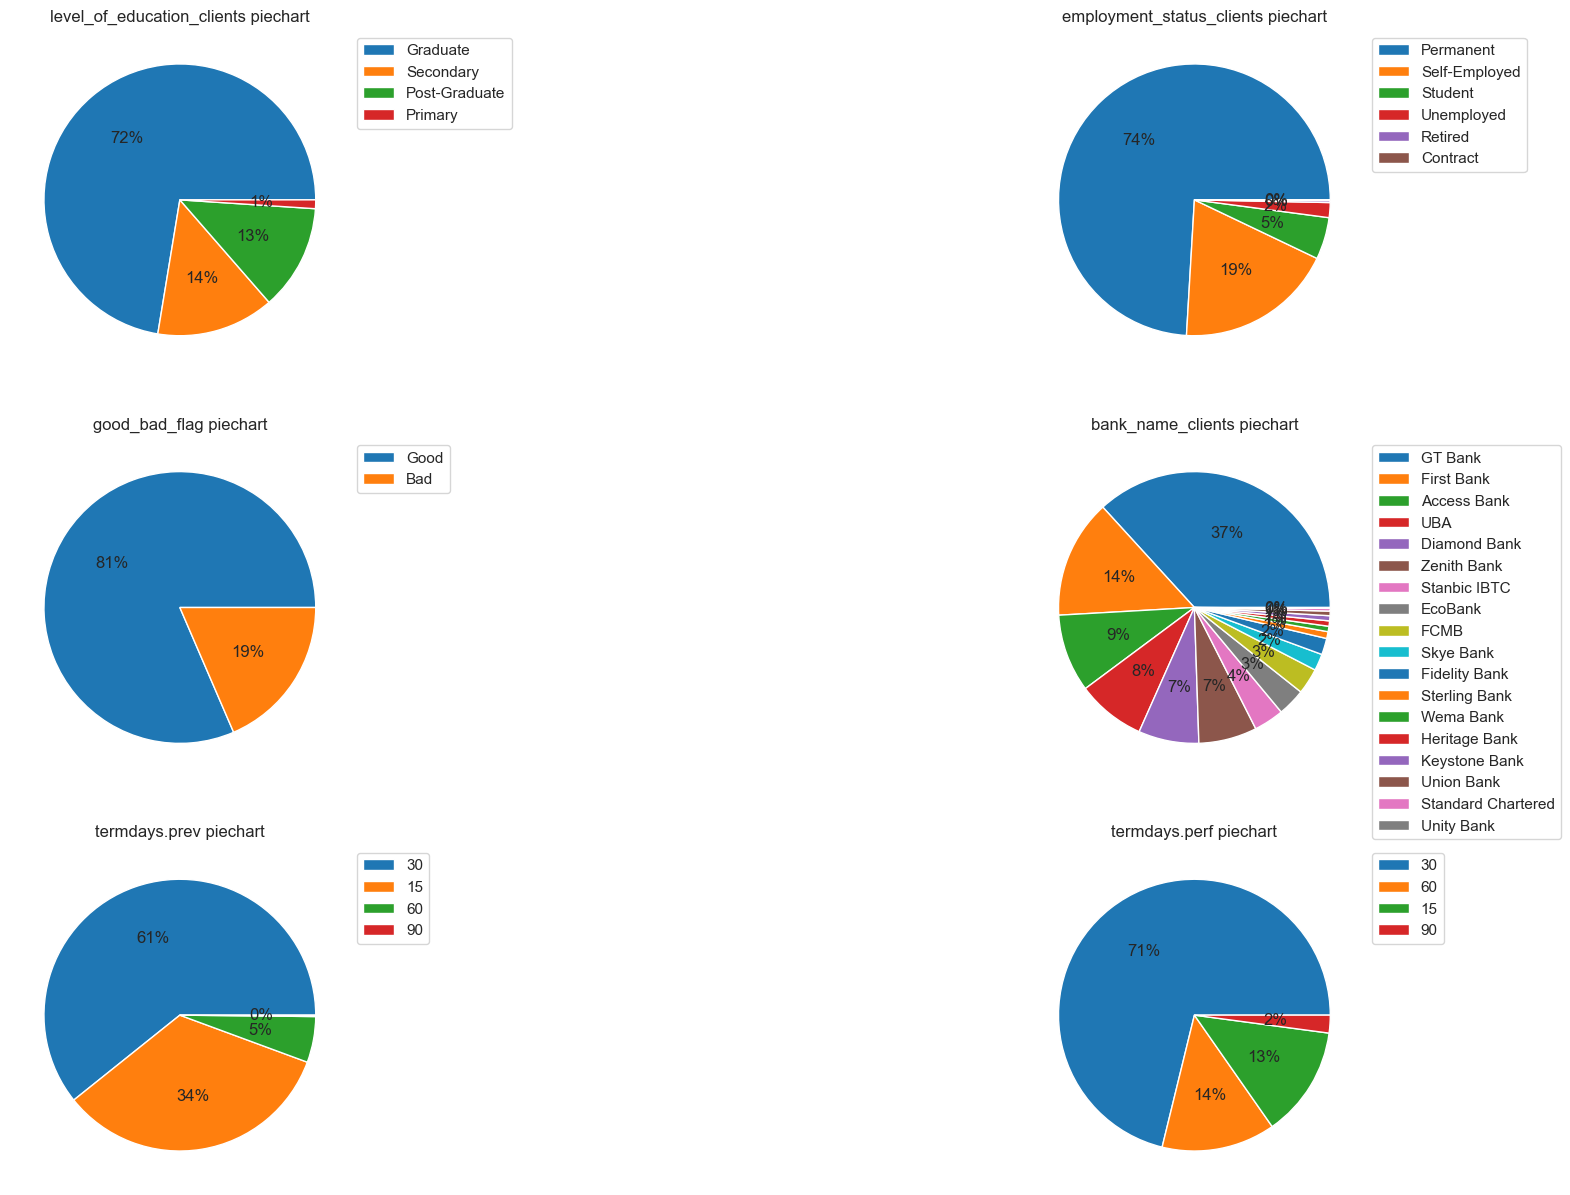

In [121]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(24, 15))
pie_cols = ['level_of_education_clients', 'employment_status_clients', 'good_bad_flag', 'bank_name_clients', 'termdays.prev', 'termdays.perf']
for i, ax in enumerate(axs.flatten()):
    pie(merged_data[pie_cols[i]], ax)

#### Distribution of numeric variables

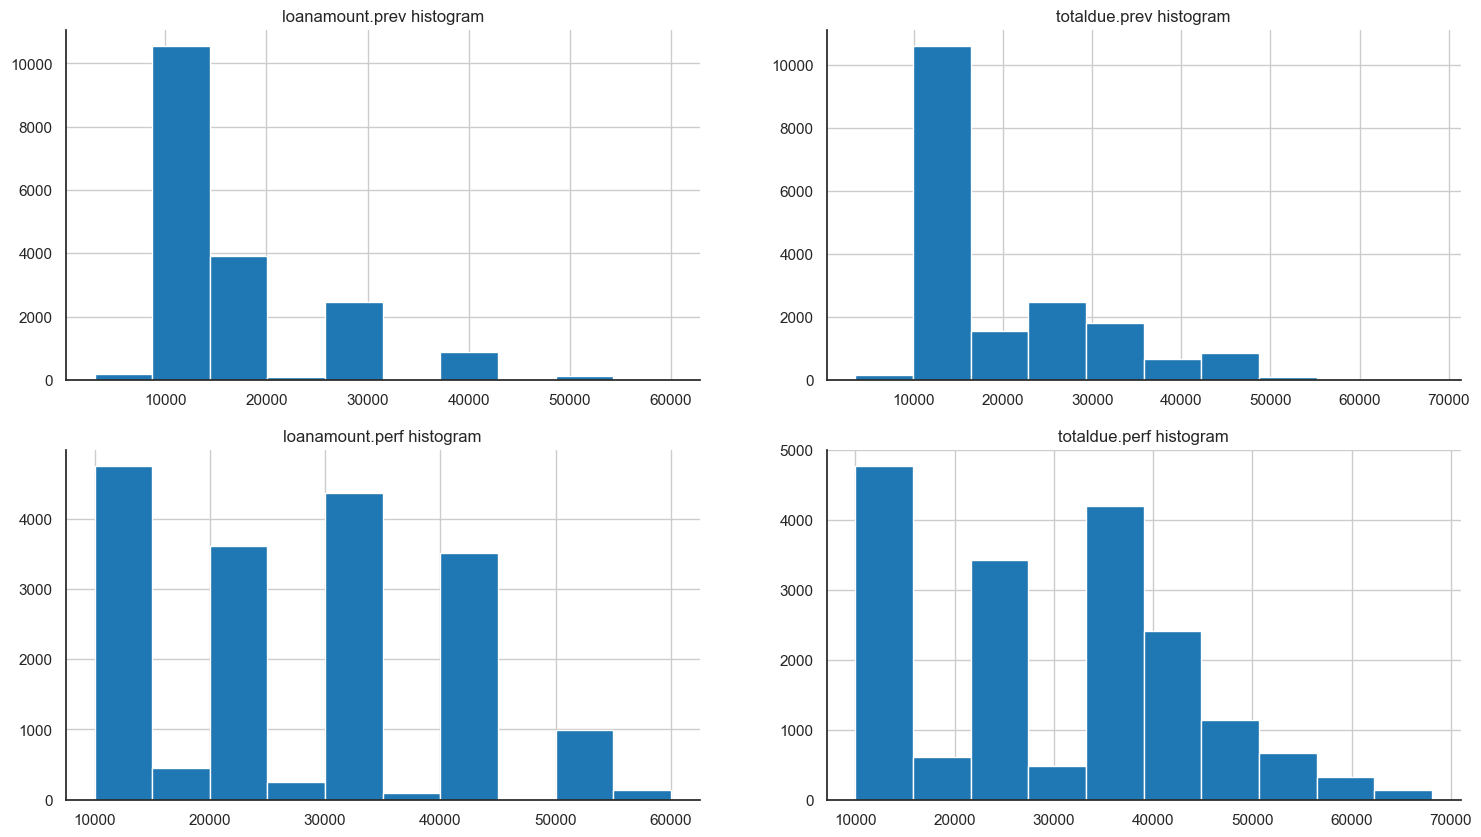

In [122]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18, 10))
hist_cols = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']
for i, ax in enumerate(axs.flatten()):
    merged_data[hist_cols[i]].hist(ax=ax)
    ax.set_title(f'{hist_cols[i]} histogram')

#### Distribution of customers

In [124]:
import plotly.express as px

fig = px.scatter_mapbox(merged_data, lat='latitude_gps', lon='longitude_gps', zoom=10)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=10,  
    mapbox_center={"lat": merged_data['latitude_gps'].mean(), "lon": merged_data['longitude_gps'].mean()}  # Center the map around the data
)
fig.show();